<a href="https://colab.research.google.com/github/EVELIN0810/SenalesySistemas/blob/main/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARCIAL 2 SyS
  Evelin Mayerlin Giraldo Obando

## Punto 1 - Función de Transferencia del Sistema Masa-Resorte-Amortiguador

Se analiza un sistema mecánico conformado por una **masa (m)**, un **resorte (k)** y un **amortiguador viscoso (c)**. Este sistema se ve sometido a una fuerza externa $ F_E(t) $, y su desplazamiento es denotado por $ y(t) $.

###  Ecuación del sistema (modelo mecánico)

Aplicando la Segunda Ley de Newton al sistema, se obtiene:

$
F_E(t) = m\ddot{y}(t) + c\dot{y}(t) + ky(t)
$

Donde:
- $ m $: masa (kg)
- $ c $: coeficiente de amortiguamiento (N·s/m)
- $ k $: constante del resorte (N/m)
- $ y(t) $: desplazamiento de la masa (m)
- $ F_E(t) $: fuerza aplicada (N)

### Transformada de Laplace

Asumiendo **condiciones iniciales cero**, la ecuación se transforma al dominio de Laplace:

$
m s^2 Y(s) + c s Y(s) + k Y(s) = F_E(s)
$

Factorizando $ Y(s) $:

$
Y(s)(ms^2 + cs + k) = F_E(s)
$

###  Función de Transferencia

La función de transferencia del sistema es:

$
G(s) = \frac{Y(s)}{F_E(s)} = \frac{1}{ms^2 + cs + k}
$

Esta función describe cómo responde el desplazamiento $ y(t) $ ante una fuerza externa $ F_E(t) $.




Este punto presenta la simulación de sistemas dinámicos de segundo orden. Se analizan:

- Respuestas temporales: escalón, impulso y rampa.
- Diagrama de Bode y plano de polos y ceros.
- Parámetros temporales: sobreimpulso, tiempo de levantamiento, tiempo al pico y tiempo de establecimiento.
- Modelos físicos: masa-resorte-amortiguador.

Se estudian cuatro tipos de comportamiento del sistema:

1. **Subamortiguado** (ζ < 1)
2. **Sobreamortiguado** (ζ > 1)
3. **Críticamente amortiguado** (ζ = 1)
4. **Inestable** (ζ < 0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, step, impulse, lsim, tf2zpk, bode


In [ ]:
def get_response(sys, t, tipo):
    """
    Retorna la respuesta del sistema 'sys' según el tipo de entrada:
    - 'Escalón': respuesta al escalón unitario.
    - 'Impulso': respuesta al impulso unitario.
    - 'Rampa': respuesta a una rampa unitaria (u(t) = t).

    Parámetros:
    - sys: sistema dinámico.
    - t: vector de tiempo.
    - tipo: tipo de entrada ('Escalón', 'Impulso', 'Rampa').

    Retorna:
    - t, y: tiempo y respuesta del sistema.
    """
    if tipo == "Escalón":
        return step(sys, T=t)
    elif tipo == "Impulso":
        return impulse(sys, T=t)
    elif tipo == "Rampa":
        u = t
        _, y, _ = lsim(sys, U=u, T=t)
        return t, y


def calc_parametros(t, y):
    """
    Calcula parámetros típicos de respuesta:
    - tr: tiempo de subida (10% a 90%).
    - Mp: sobrepaso máximo (%).
    - tp: tiempo al pico.
    - ts: tiempo de establecimiento (±2%).

    Retorna:
    - tr, Mp, tp, ts
    """
    try:
        tr = t[np.where(y >= 0.9)[0][0]] - t[np.where(y >= 0.1)[0][0]]
    except:
        tr = np.nan
    try:
        ts = t[np.where(np.abs(y - 1) < 0.02)[0][0]]
    except:
        ts = np.nan
    tp = t[np.argmax(y)]
    Mp = (np.max(y) - 1) * 100
    return tr, Mp, tp, ts



 Tipo: Subamortiguada | ζ = 0.5


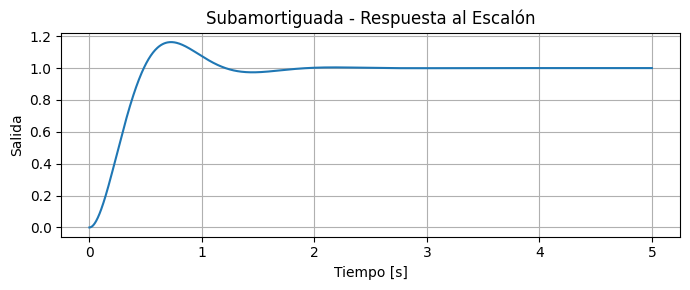

- tr: 0.325 s | Mp: 16.30% | tp: 0.726 s | ts: 0.475 s


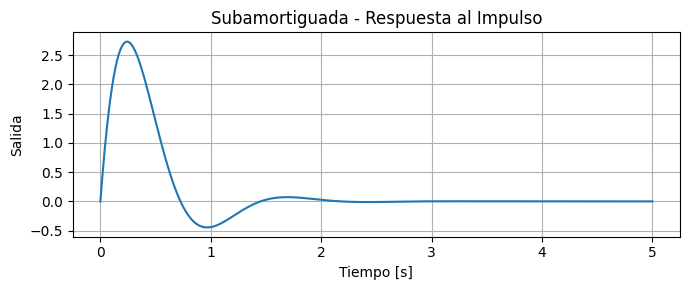

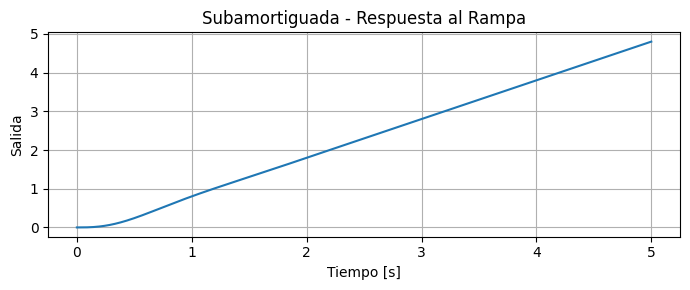


 Tipo: Amortiguamiento crítico | ζ = 1.0


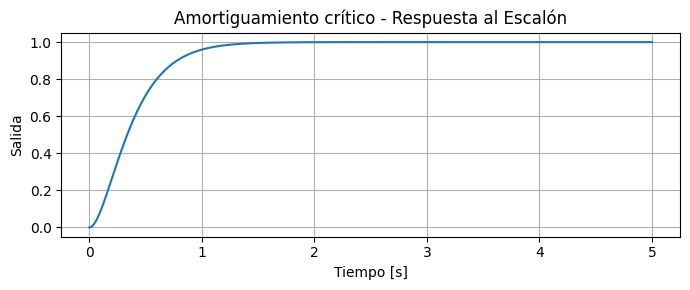

- tr: 0.671 s | Mp: -0.00% | tp: 5.000 s | ts: 1.171 s


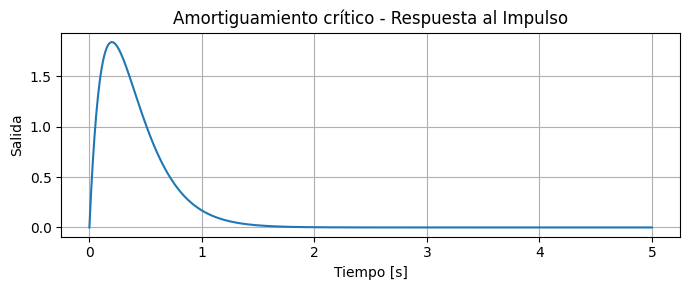

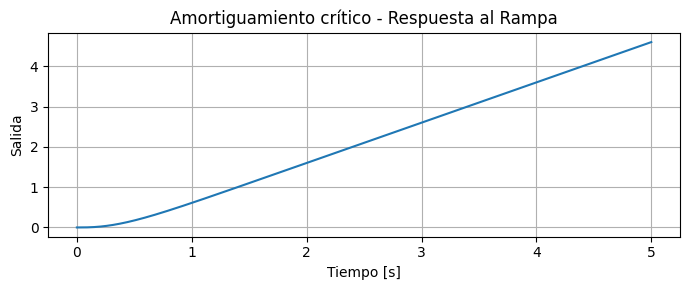


 Tipo: Sobreamortiguada | ζ = 2.0


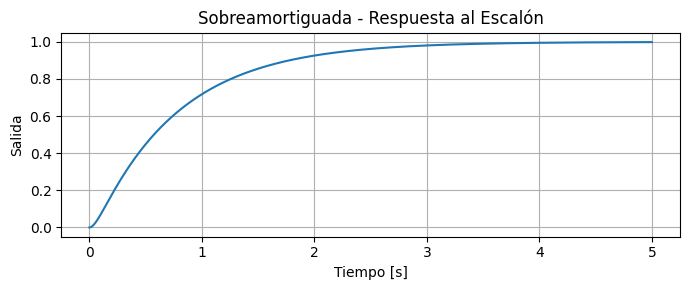

- tr: 1.647 s | Mp: -0.13% | tp: 5.000 s | ts: 2.978 s


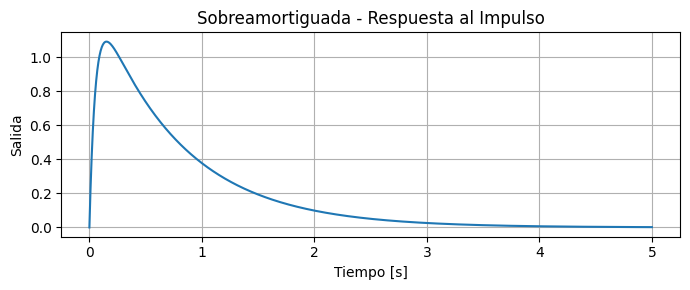

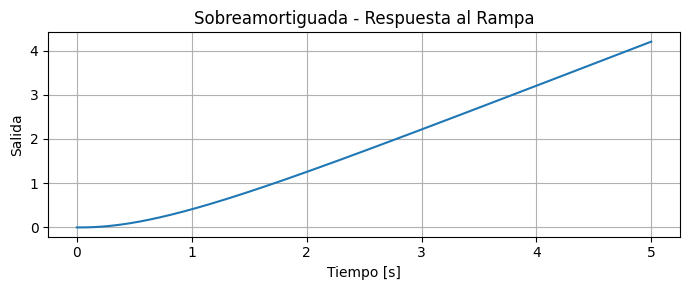


 Tipo: Inestable | ζ = -1.0


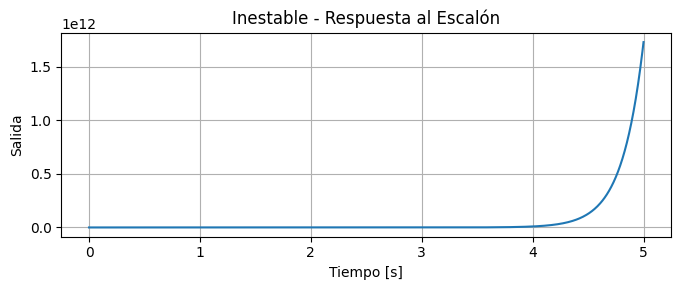

- tr: 0.115 s | Mp: 172811758409773.78% | tp: 5.000 s | ts: 0.200 s


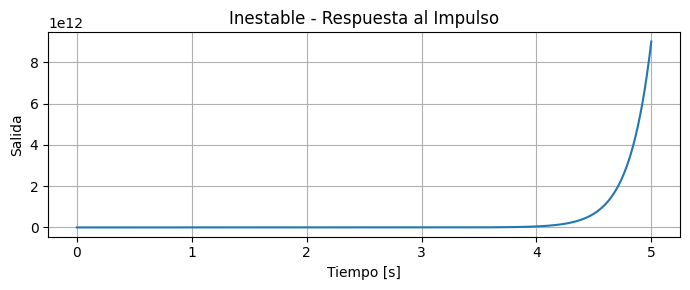

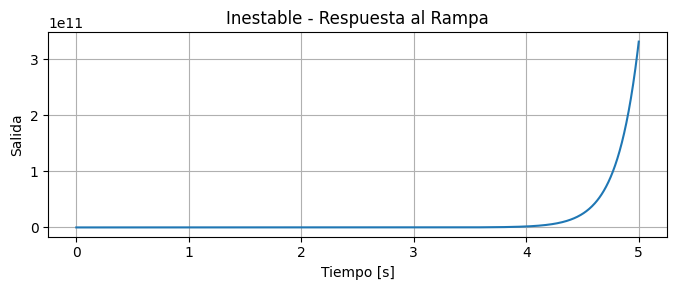

In [ ]:
# Diccionario con tipos de amortiguamiento y su coeficiente ζ (zeta)
tipos = {
    "Subamortiguada": 0.5,
    "Amortiguamiento crítico": 1.0,
    "Sobreamortiguada": 2.0,
    "Inestable": -1.0
}

wn = 5  # Frecuencia natural
t = np.linspace(0, 5, 1000)  # Vector de tiempo

# Recorre cada tipo de sistema
for tipo, zeta in tipos.items():
    # Define la función de transferencia de segundo orden
    num = [wn**2]
    den = [1, 2*zeta*wn, wn**2]
    sys = TransferFunction(num, den)

    print(f"\n Tipo: {tipo} | ζ = {zeta}")

    # Respuesta para diferentes entradas
    for entrada in ["Escalón", "Impulso", "Rampa"]:
        t_resp, y_resp = get_response(sys, t, entrada)

        # Graficar la respuesta
        plt.figure(figsize=(7, 3))
        plt.plot(t_resp, y_resp)
        plt.title(f"{tipo} - Respuesta al {entrada}")
        plt.xlabel("Tiempo [s]")
        plt.ylabel("Salida")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Calcular y mostrar parámetros si es escalón
        if entrada == "Escalón":
            tr, Mp, tp, ts = calc_parametros(t_resp, y_resp)
            print(f"- tr: {tr:.3f} s | Mp: {Mp:.2f}% | tp: {tp:.3f} s | ts: {ts:.3f} s")



 Tipo: Subamortiguada | ζ = 0.5


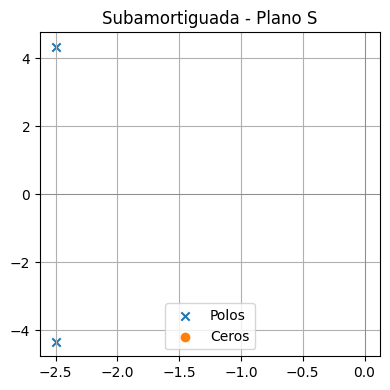

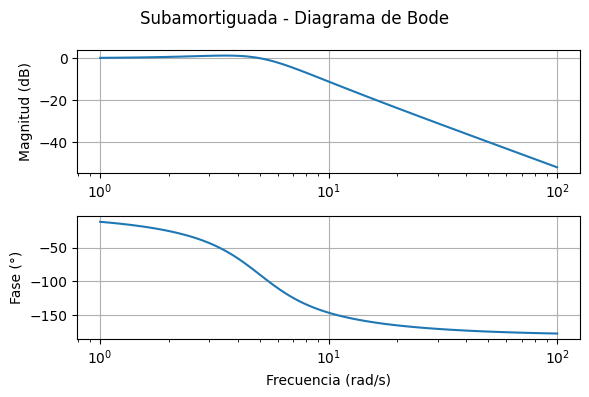


 Tipo: Amortiguamiento crítico | ζ = 1.0


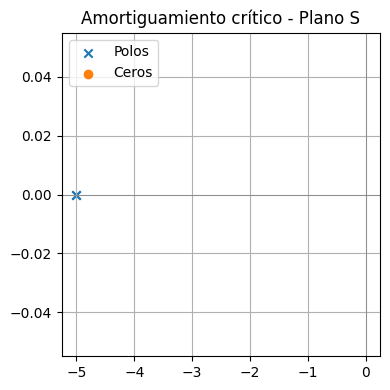

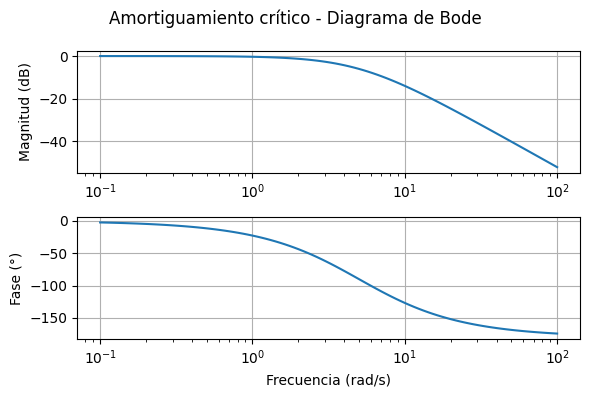


 Tipo: Sobreamortiguada | ζ = 2.0


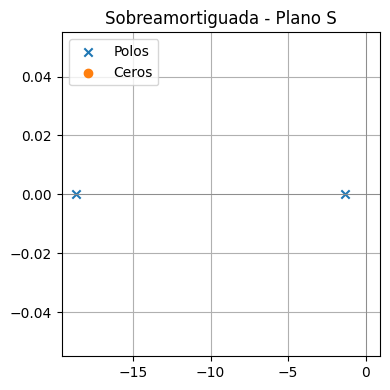

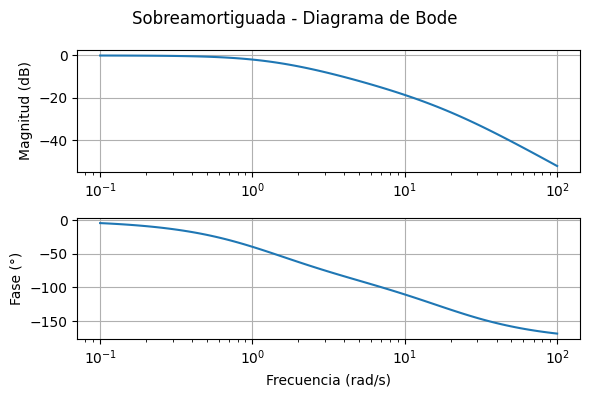


 Tipo: Inestable | ζ = -1.0


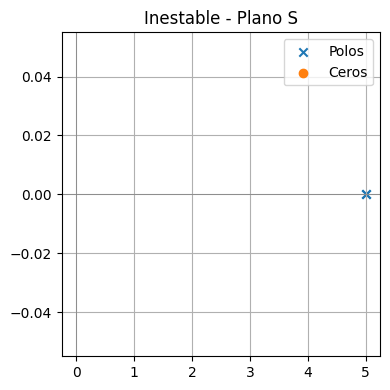

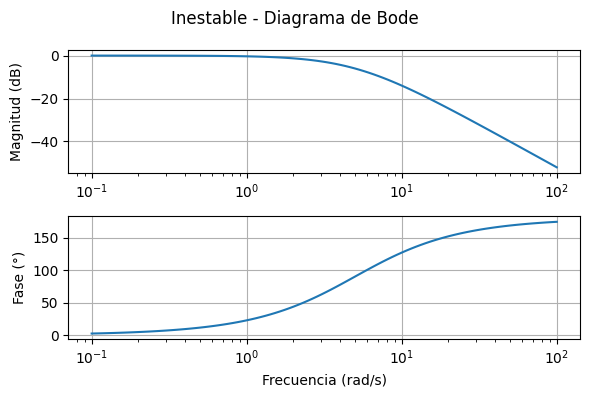

In [ ]:
# Recorre cada tipo de sistema con su coeficiente de amortiguamiento ζ
for tipo, zeta in tipos.items():
    # Función de transferencia de segundo orden
    num = [wn**2]
    den = [1, 2*zeta*wn, wn**2]
    sys = TransferFunction(num, den)

    print(f"\n Tipo: {tipo} | ζ = {zeta}")

    #  Plano S (Polos y ceros)
    z, p, _ = tf2zpk(num, den)
    plt.figure(figsize=(4, 4))
    plt.scatter(np.real(p), np.imag(p), marker='x', label='Polos')
    plt.scatter(np.real(z), np.imag(z), marker='o', label='Ceros')
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.grid(True)
    plt.title(f"{tipo} - Plano S")
    plt.legend()
    plt.tight_layout()
    plt.show()

    #  Diagrama de Bode
    w, mag, phase = bode(sys)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4))
    ax1.semilogx(w, mag)
    ax1.set_ylabel("Magnitud (dB)")
    ax1.grid(True)
    ax2.semilogx(w, phase)
    ax2.set_xlabel("Frecuencia (rad/s)")
    ax2.set_ylabel("Fase (°)")
    ax2.grid(True)
    fig.suptitle(f"{tipo} - Diagrama de Bode", fontsize=12)
    fig.tight_layout()
    plt.show()


## Modelo físico equivalente

Para un sistema masa-resorte-amortiguador:

- Ecuación diferencial: $ m\ddot{x} + c\dot{x} + kx = F(t) $
- Función de transferencia:
  $$
  \frac{X(s)}{F(s)} = \frac{1}{ms^2 + cs + k}
  $$

Relación con sistema eléctrico RLC:

- \( m \) ↔ \( L \)
- \( c \) ↔ \( R \)
- $ \frac{1}{k} $ ↔ \( C \)

Usamos \( m = 1 \) y obtenemos los parámetros eléctricos equivalentes para cada tipo de sistema.


In [ ]:
m = 1
for tipo, zeta in tipos.items():
    k = wn**2 * m
    c = 2 * zeta * wn * m
    R, L, C = c, m, 1/k
    print(f"\n⚙️ Tipo: {tipo}")
    print(f"- Masa: {m:.2f} kg | Resorte: {k:.2f} N/m | Amortiguador: {c:.2f} N·s/m")
    print(f"- Equiv. RLC → R: {R:.2f} Ω | L: {L:.2f} H | C: {C:.5f} F")



⚙️ Tipo: Subamortiguada
- Masa: 1.00 kg | Resorte: 25.00 N/m | Amortiguador: 5.00 N·s/m
- Equiv. RLC → R: 5.00 Ω | L: 1.00 H | C: 0.04000 F

⚙️ Tipo: Amortiguamiento crítico
- Masa: 1.00 kg | Resorte: 25.00 N/m | Amortiguador: 10.00 N·s/m
- Equiv. RLC → R: 10.00 Ω | L: 1.00 H | C: 0.04000 F

⚙️ Tipo: Sobreamortiguada
- Masa: 1.00 kg | Resorte: 25.00 N/m | Amortiguador: 20.00 N·s/m
- Equiv. RLC → R: 20.00 Ω | L: 1.00 H | C: 0.04000 F

⚙️ Tipo: Inestable
- Masa: 1.00 kg | Resorte: 25.00 N/m | Amortiguador: -10.00 N·s/m
- Equiv. RLC → R: -10.00 Ω | L: 1.00 H | C: 0.04000 F


## Conclusiones

- Los sistemas de segundo orden presentan comportamientos dinámicos claramente diferenciables dependiendo del valor del factor de amortiguamiento $ \zeta $:
  - **Subamortiguado**: presenta oscilaciones antes de alcanzar el estado estacionario. Es típico en sistemas con buena respuesta rápida, como en controladores de posición.
  - **Amortiguamiento crítico**: es la condición óptima para alcanzar el equilibrio en el menor tiempo sin sobrepasarse. Se considera ideal en sistemas donde se requiere velocidad sin sobreimpulso.
  - **Sobreamortiguado**: responde sin oscilaciones pero de manera más lenta. Útil cuando la estabilidad es prioritaria sobre la rapidez.
  - **Inestable**: muestra un crecimiento exponencial de la respuesta, indicando la imposibilidad de control sin corrección.

- A partir del modelo masa-resorte-amortiguador, se identificó una **analogía directa con sistemas eléctricos RLC**, lo que permite utilizar técnicas del análisis de circuitos para resolver problemas mecánicos.

- Se visualizaron las **respuestas al escalón, impulso y rampa**, junto con el **plano de polos y ceros** y el **diagrama de Bode**, lo cual proporciona una comprensión integral de la dinámica del sistema tanto en el dominio del tiempo como en el de la frecuencia.

- La implementación en Python permitió observar gráficamente el comportamiento dinámico del sistema para diferentes configuraciones, fortaleciendo la comprensión de los efectos del amortiguamiento en la respuesta del sistema.

- Este análisis es clave en ingeniería de control, mecánica y electrónica, ya que muchos sistemas físicos reales pueden modelarse como sistemas de segundo orden o aproximarse a ellos en sus primeras dinámicas.


# Punto 2 - Modulación y Demodulación SSB-AM (Banda Lateral Única)



Este punto presenta el modelo matemático de la modulación y demodulación por amplitud en banda lateral única (SSB-AM), utilizando la Transformada de Fourier para analizar el proceso en los dominios del tiempo y la frecuencia.

La modulación SSB se basa en obtener la señal analítica $ m_a(t) = m(t) + j\hat{m}(t) $, cuya transformada de Fourier elimina las componentes negativas del espectro del mensaje. Luego, al modular con una portadora compleja, el espectro se desplaza, dejando solo una banda lateral (USB o LSB).

La demodulación se realiza multiplicando la señal modulada por la portadora original (detección coherente) y aplicando un filtro pasa bajos que recupera la señal base. En frecuencia, esto equivale a desplazar nuevamente el espectro a su posición original y filtrar las frecuencias no deseadas.

Este modelo permite una transmisión más eficiente, con menor uso de ancho de banda y eliminación de redundancias espectrales.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, butter, lfilter
from scipy.fft import fft, fftfreq


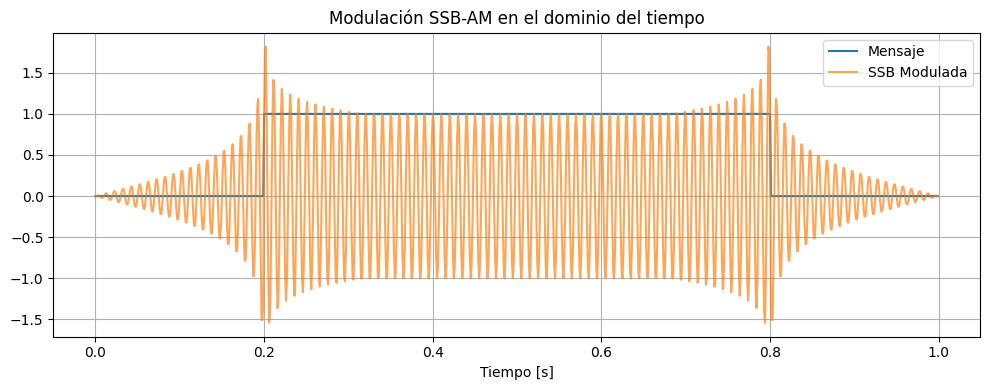

In [ ]:
# Parámetros
fs = 1000  # Frecuencia de muestreo
T = 1.0    # Duración (s)
t = np.linspace(0, T, int(fs*T), endpoint=False)
fc = 100   # Frecuencia de portadora

# Señal mensaje: pulso rectangular
mensaje = np.where((t >= 0.2) & (t <= 0.8), 1.0, 0.0)

# Transformada de Hilbert
mensaje_analitica = hilbert(mensaje)

# Señal modulada SSB
ssb = np.real(mensaje_analitica * np.exp(1j * 2 * np.pi * fc * t))

# Visualización
plt.figure(figsize=(10, 4))
plt.plot(t, mensaje, label='Mensaje')
plt.plot(t, ssb, label='SSB Modulada', alpha=0.7)
plt.title("Modulación SSB-AM en el dominio del tiempo")
plt.xlabel("Tiempo [s]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Modelo matemático – Dominio de la frecuencia

Sea \( M(f) \) la Transformada de Fourier de la señal \( m(t) \). La modulación DSB genera dos bandas laterales:

$$
S_{DSB}(f) = \frac{1}{2} [M(f - f_c) + M(f + f_c)]
$$

La modulación SSB elimina una de las bandas laterales usando la transformada de Hilbert:

$$
S_{SSB}(f) = M(f - f_c) \quad \text{(para BLU)} \quad \text{o} \quad M(f + f_c) \quad \text{(para BLD)}
$$

Esto se logra en la práctica multiplicando la señal analítica por una exponencial compleja.


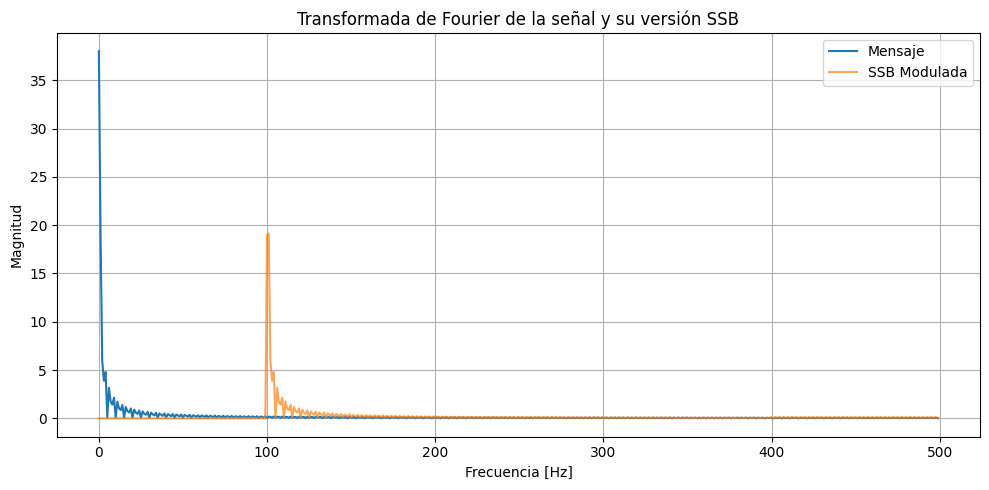

In [ ]:
def espectro(x, fs):
    N = len(x)
    f = fftfreq(N, d=1/fs)
    X = fft(x)
    return f[:N//2], 2/np.sqrt(N) * np.abs(X[:N//2])

f1, M = espectro(mensaje, fs)
f2, SSB = espectro(ssb, fs)

plt.figure(figsize=(10, 5))
plt.plot(f1, M, label="Mensaje")
plt.plot(f2, SSB, label="SSB Modulada", alpha=0.7)
plt.title("Transformada de Fourier de la señal y su versión SSB")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


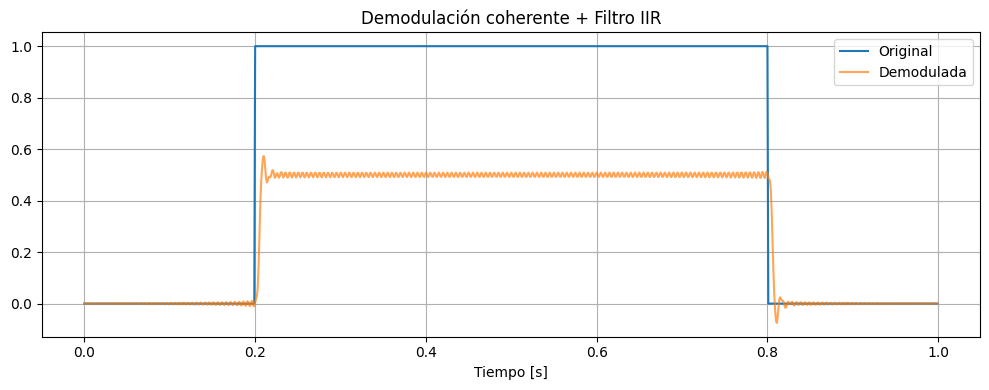

In [ ]:
# Demodulación coherente
producto = ssb * np.cos(2 * np.pi * fc * t)

# Filtro IIR pasa bajas
def filtro_iir_pasabajo(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    from scipy.signal import butter
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def aplicar_filtro(x, b, a):
    return lfilter(b, a, x)

b, a = filtro_iir_pasabajo(fc, fs)
demodulada = aplicar_filtro(producto, b, a)

# Mostrar señal demodulada
plt.figure(figsize=(10, 4))
plt.plot(t, mensaje, label="Original")
plt.plot(t, demodulada, label="Demodulada", alpha=0.7)
plt.title("Demodulación coherente + Filtro IIR")
plt.xlabel("Tiempo [s]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Conclusiones

- Se presentó el modelo matemático del proceso de modulación y demodulación SSB-AM.
- En el dominio del tiempo, se usó la transformada de Hilbert para construir la señal analítica.
- En el dominio de la frecuencia, se analizaron las bandas laterales usando la Transformada de Fourier.
- Se implementó la modulación SSB y la demodulación coherente, incluyendo el uso de filtros digitales IIR.
- El resultado demuestra cómo se puede recuperar la señal original tras eliminar una banda lateral, ahorrando ancho de banda.


# **DASHBOARD**

In [ ]:
!pip install streamlit pyngrok --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.2 MB/s eta 0:00:00


In [ ]:
# Paso 2: Agrega tu authtoken de ngrok (solo una vez)
!ngrok config add-authtoken 2zZfdnAvX6tUJI08cN8hhSWdY4H_7E2PJuqohADwomd8ERAiL


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install streamlit
!pip install pyngrok
!pip install soundfile


In [ ]:
pip install streamlit matplotlib scipy soundfile yt-dlp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.5 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, step, impulse, tf2zpk, bode, lsim
from scipy.signal import butter, lfilter, freqz, hilbert
from scipy.fftpack import fft, fftfreq
import soundfile as sf
import io

# CONFIGURACIÓN GENERAL
st.set_page_config(page_title="Parcial 2 - Evelin Mayerlin Giraldo Obando", layout="wide")
st.title("🧪 Parcial 2 - Señales y Sistemas")
st.caption("Estudiante: Evelin Mayerlin Giraldo Obando")

# MENÚ LATERAL
st.sidebar.title("📚 Menú de Puntos")
punto = st.sidebar.radio("Selecciona el punto a resolver:", [
    "Página principal",
    "Punto 1: Simulación de sistemas",
    "Punto 2: Modulación SSB-AM"
])

# PÁGINA PRINCIPAL
if punto == "Página principal":
    st.subheader("📄 Página principal")
    st.markdown("""
    Este panel contiene el desarrollo del **Parcial 2** de la asignatura **Señales y Sistemas**.

    Se presentan dos puntos:

    - **Punto 1**: Simulación de sistemas de segundo orden, con análisis en lazo abierto y cerrado.
    - **Punto 2**: Modelado e implementación del sistema de modulación y demodulación SSB-AM (Single Side Band Amplitude Modulation), usando señales sintéticas y reales.

    Cada módulo contiene explicaciones detalladas, gráficos interactivos y parámetros claves del sistema.
    """)

# PUNTO 1
elif punto == "Punto 1: Simulación de sistemas":
    st.header("🔹 Punto 1: Simulación de sistemas de segundo orden")

    st.markdown("""
    Este módulo simula la respuesta de sistemas dinámicos de **segundo orden**, como los encontrados en modelos mecánicos masa-resorte-amortiguador o circuitos RLC.

    #### 🧠 Modelo Matemático

    La ecuación diferencial general de un sistema masa-resorte-amortiguador es:

    $$
    m \\ddot{x}(t) + c \\dot{x}(t) + k x(t) = F(t)
    $$

    Aplicando la transformada de Laplace:

    $$
    H(s) = \\frac{X(s)}{F(s)} = \\frac{1}{m s^2 + c s + k}
    $$

    O normalizado:

    $$
    H(s) = \\frac{\\omega_n^2}{s^2 + 2 \\zeta \\omega_n s + \\omega_n^2}
    $$

    También se simula el comportamiento en **lazo cerrado** con retroalimentación unitaria.

    Se muestran:

    - Respuestas temporales
    - Diagramas de polos-ceros
    - Diagrama de Bode
    - Parámetros dinámicos
    - Modelos equivalentes mecánico y eléctrico
    """)

    tipo = st.selectbox("Selecciona el tipo de respuesta:", ["Subamortiguada", "Amortiguamiento crítico", "Sobreamortiguada", "Inestable"])

    if tipo == "Subamortiguada":
        zeta = st.slider("ζ (factor de amortiguamiento)", 0.01, 0.99, 0.5)
    elif tipo == "Amortiguamiento crítico":
        zeta = 1.0
        st.info("Amortiguamiento crítico (ζ = 1)")
    elif tipo == "Sobreamortiguada":
        zeta = st.slider("ζ (factor de amortiguamiento)", 1.01, 5.0, 2.0)
    else:
        zeta = st.slider("ζ (factor de amortiguamiento negativo)", -5.0, -0.01, -1.0)

    wn = st.slider("ωₙ (frecuencia natural en rad/s)", 0.1, 20.0, 5.0)

    num = [wn**2]
    den = [1, 2*zeta*wn, wn**2]
    s_open = TransferFunction(num, den)
    s_closed = TransferFunction(num, np.polyadd(den, num))
    t = np.linspace(0, 5, 1000)

    def get_response(sys, t, entrada):
        if entrada == "Escalón":
            return step(sys, T=t)
        elif entrada == "Impulso":
            return impulse(sys, T=t)
        elif entrada == "Rampa":
            u = t
            _, y, _ = lsim(sys, U=u, T=t)
            return t, y

    def calc_parametros(t, y):
        try:
            tr = t[np.where(y >= 0.9)[0][0]] - t[np.where(y >= 0.1)[0][0]]
        except:
            tr = np.nan
        try:
            ts = t[np.where(np.abs(y - 1) < 0.02)[0][0]]
        except:
            ts = np.nan
        tp = t[np.argmax(y)]
        Mp = (np.max(y) - 1) * 100
        return tr, Mp, tp, ts

    tabs = st.tabs(["📈 Respuestas", "📊 Polos y Bode", "📐 Parámetros", "⚙️ Componentes"])

    with tabs[0]:
        for entrada in ["Escalón", "Impulso", "Rampa"]:
            st.markdown(f"**{entrada}**")
            col = st.columns([1, 2, 1])[1]
            with col:
                fig, ax = plt.subplots(figsize=(5, 3.5))
                t_o, y_o = get_response(s_open, t, entrada)
                t_c, y_c = get_response(s_closed, t, entrada)
                ax.plot(t_o, y_o, label="Lazo Abierto")
                ax.plot(t_c, y_c, label="Lazo Cerrado", linestyle="--")
                ax.set_xlabel("Tiempo (s)")
                ax.set_ylabel("Respuesta")
                ax.grid(True)
                ax.legend()
                fig.tight_layout()
                st.pyplot(fig)

    with tabs[1]:
        z, p, _ = tf2zpk(num, den)
        col = st.columns([1, 2, 1])[1]
        with col:
            fig, ax = plt.subplots(figsize=(5, 3.5))
            ax.scatter(np.real(p), np.imag(p), marker='x', label='Polos')
            ax.scatter(np.real(z), np.imag(z), marker='o', label='Ceros')
            ax.axhline(0, color='gray', lw=0.5)
            ax.axvline(0, color='gray', lw=0.5)
            ax.set_title("Plano S")
            ax.grid(True)
            ax.legend()
            fig.tight_layout()
            st.pyplot(fig)

        w, mag, phase = bode(s_open)
        col = st.columns([1, 2, 1])[1]
        with col:
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 4))
            ax1.semilogx(w, mag)
            ax1.set_ylabel("Magnitud (dB)")
            ax1.grid(True)
            ax2.semilogx(w, phase)
            ax2.set_xlabel("Frecuencia (rad/s)")
            ax2.set_ylabel("Fase (°)")
            ax2.grid(True)
            fig.tight_layout()
            st.pyplot(fig)

    with tabs[2]:
        _, y = step(s_closed, T=t)
        tr, Mp, tp, ts = calc_parametros(t, y)
        st.write(f"- Tiempo de levantamiento (10–90%): **{tr:.3f} s**")
        st.write(f"- Sobreimpulso máximo: **{Mp:.2f} %**")
        st.write(f"- Tiempo al pico: **{tp:.3f} s**")
        st.write(f"- Tiempo de establecimiento: **{ts:.3f} s**")

    with tabs[3]:
        m = 1
        k = wn**2 * m
        c = 2 * zeta * wn * m
        R, L, C = c, m, 1/k
        st.markdown("**Sistema mecánico equivalente:**")
        st.write(f"- Masa (m): {m:.2f} kg")
        st.write(f"- Resorte (k): {k:.2f} N/m")
        st.write(f"- Amortiguador (c): {c:.2f} N·s/m")
        st.markdown("**Circuito eléctrico equivalente:**")
        st.write(f"- Resistencia (R): {R:.2f} Ω")
        st.write(f"- Inductancia (L): {L:.2f} H")
        st.write(f"- Capacitancia (C): {C:.5f} F")

# PUNTO 2
elif punto == "Punto 2: Modulación SSB-AM":
    st.header("📡 Punto 2: Modulación y Demodulación SSB-AM")
    st.markdown("""
    Este módulo permite modelar y analizar el proceso de **modulación y demodulación por amplitud en banda lateral única (SSB-AM)** usando señales sintéticas y reales.

    ### 🧠 Modelo Matemático

    Dominio del tiempo:
    $$
    s_{SSB}(t) = \\Re\\left\\{ \\left[ m(t) + j \\hat{m}(t) \\right] e^{j2\\pi f_c t} \\right\\}
    $$

    Dominio de la frecuencia:
    $$
    M_a(f) = 2U(f)M(f)
    $$

    El sistema incluye:
    - Transformada de Hilbert (para señal analítica)
    - Modulación con portadora
    - Demodulación coherente
    - Filtro IIR para reconstrucción

    Se visualizan las señales en tiempo, frecuencia, y el comportamiento del filtro.
    """)

    tipo_senal = st.selectbox("Tipo de señal mensaje:", ["Pulso rectangular", "Fragmento de canción"])
    fs = 1000
    T = 1.0
    f_portadora = st.slider("Frecuencia de portadora [Hz]", 50, 300, 100)

    def obtener_fft(x, fs):
        N = len(x)
        X = fft(x)
        f = fftfreq(N, 1/fs)
        return f[:N//2], 2/np.sqrt(N) * np.abs(X[:N//2])

    def filtro_pasa_bajo(cutoff, fs, order=5):
        nyq = 0.5 * fs
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return np.array(b, dtype=np.float64), np.array(a, dtype=np.float64)

    def aplicar_filtro(data, b, a):
        return lfilter(b, a, data)

    if tipo_senal == "Pulso rectangular":
        t = np.linspace(0, T, int(fs*T), endpoint=False)
        mensaje = np.where((t >= 0.2) & (t <= 0.8), 1.0, 0.0)
        st.markdown("### 🟩 Señal mensaje: Pulso rectangular")

    elif tipo_senal == "Fragmento de canción":
        archivo = st.file_uploader("Sube un archivo WAV", type=["wav"])
        if archivo is not None:
            mensaje, fs = sf.read(io.BytesIO(archivo.read()))
            mensaje = mensaje[:int(fs*5)]
            if mensaje.ndim > 1:
                mensaje = mensaje[:, 0]  # Mono
            t = np.linspace(0, len(mensaje)/fs, len(mensaje), endpoint=False)
            st.markdown("### 🎵 Señal mensaje: Fragmento de canción")
        else:
            st.warning("Por favor sube un archivo WAV.")
            st.stop()

    analitica = hilbert(mensaje)
    ssb = np.real(analitica * np.exp(1j*2*np.pi*f_portadora*t))
    producto = ssb * np.cos(2*np.pi*f_portadora*t)
    b, a = filtro_pasa_bajo(f_portadora, fs)
    demodulada = aplicar_filtro(producto, b, a)

    tabs = st.tabs(["🕒 Tiempo", "🔊 Frecuencia", "🔁 Etapas", "📉 Bode y Polos"])

    with tabs[0]:
        col = st.columns([1, 2, 1])[1]
        with col:
            fig, ax = plt.subplots(3, 1, figsize=(6, 5))
            ax[0].plot(t, mensaje)
            ax[0].set_title("Mensaje")
            ax[1].plot(t, ssb)
            ax[1].set_title("Modulada SSB")
            ax[2].plot(t, demodulada)
            ax[2].set_title("Demodulada")
            for a_ in ax: a_.grid(True)
            fig.tight_layout()
            st.pyplot(fig)

    with tabs[1]:
        f1, M = obtener_fft(mensaje, fs)
        f2, S = obtener_fft(ssb, fs)
        f3, D = obtener_fft(demodulada, fs)
        col = st.columns([1, 2, 1])[1]
        with col:
            fig, ax = plt.subplots(3, 1, figsize=(6, 5))
            ax[0].plot(f1, M)
            ax[0].set_title("Mensaje - Frecuencia")
            ax[1].plot(f2, S)
            ax[1].set_title("SSB Modulada - Frecuencia")
            ax[2].plot(f3, D)
            ax[2].set_title("Demodulada - Frecuencia")
            for a_ in ax: a_.grid(True)
            fig.tight_layout()
            st.pyplot(fig)

    with tabs[2]:
        st.markdown("""
        - **Mensaje**: señal original.
        - **Señal analítica**: por transformada de Hilbert.
        - **Modulación SSB**: se aplica portadora compleja.
        - **Demodulación**: multiplicación coherente y filtrado.
        """)

    with tabs[3]:
        w, h = freqz(b, a, fs=fs)
        col = st.columns([1, 2, 1])[1]
        with col:
            fig1, ax1 = plt.subplots(figsize=(5, 3))
            ax1.plot(w, 20 * np.log10(np.abs(h)))
            ax1.set_title("Diagrama de Bode")
            ax1.set_ylabel("Magnitud (dB)")
            ax1.set_xlabel("Frecuencia (Hz)")
            ax1.grid(True)
            fig1.tight_layout()
            st.pyplot(fig1)

        col = st.columns([1, 2, 1])[1]
        with col:
            z, p, _ = tf2zpk(b, a)
            fig2, ax2 = plt.subplots(figsize=(4, 4))
            ax2.scatter(np.real(p), np.imag(p), marker='x', label='Polos')
            ax2.scatter(np.real(z), np.imag(z), marker='o', label='Ceros')
            ax2.axhline(0, color='gray', lw=0.5)
            ax2.axvline(0, color='gray', lw=0.5)
            ax2.set_title("Plano Polos y Ceros")
            ax2.grid(True)
            ax2.legend()
            fig2.tight_layout()
            st.pyplot(fig2)


Overwriting app.py


In [ ]:
# Paso 4: Ejecutar streamlit y abrir con ngrok
from pyngrok import ngrok
!streamlit run app.py &> /dev/null &
url = ngrok.connect(8501)
print("🔗 Haz clic aquí para abrir el dashboard:", url)


🔗 Haz clic aquí para abrir el dashboard: NgrokTunnel: "https://e4e6030089b6.ngrok-free.app" -> "http://localhost:8501"
